In [1]:
#Importar las librerías necesarias
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
from IPython.display import display_html
from scipy import stats
import datetime as dt

In [2]:
#Leer las tablas originales
raw_hypothesis = pd.read_csv('hypothesis.csv')
raw_orders = pd.read_csv('orders_us.csv')
raw_visitors = pd.read_csv('visitors_us.csv')

In [3]:
#Crear función para primer vistazo de los datos
def first_lookup (dataframe):
    print('-----Dataframe information-----')
    display(dataframe.info())
    print('\n-----Statistics-----\n')
    display(dataframe.describe())
    print('\n-----Duplicates-----\n')
    print(dataframe.duplicated().sum())
    print('\n-----Empty values-----\n')
    print(dataframe.isna().sum())
    print('\n-----Head rows-----\n')
    display(dataframe.head(10))    

In [4]:
#Llamada a la función para primer vistazo de la tabla de hipótesis
first_lookup(raw_hypothesis)

-----Dataframe information-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


None


-----Statistics-----



,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000



-----Duplicates-----

0

-----Empty values-----

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

-----Head rows-----



,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [5]:
#Llamada a la función para primer vistazo de la tabla de órdenes
first_lookup(raw_orders)

-----Dataframe information-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


None


-----Statistics-----



,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000



-----Duplicates-----

0

-----Empty values-----

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

-----Head rows-----



,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B


In [6]:
#Llamada a la función para primer vistazo de la tabla de visitantes
first_lookup(raw_visitors)

-----Dataframe information-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None


-----Statistics-----



,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000



-----Duplicates-----

0

-----Empty values-----

date      0
group     0
visits    0
dtype: int64

-----Head rows-----



,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


# LIMPIEZA DE LOS DATOS

In [7]:
#Crear copias de las tablas originales
clean_hypothesis = raw_hypothesis.copy()
clean_orders = raw_orders.copy()
clean_visitors = raw_visitors.copy()

In [8]:
# translator = Translator()
# hypotheses['Hypothesis'] = hypotheses['Hypothesis'].apply(lambda x: translator.translate(x, src='ru', dest='es').text)

In [9]:
#Limpiar nombres de las columnas de todas las tablas
clean_hypothesis.columns = [columna.lower().replace(' ','_') for columna in clean_hypothesis.columns]
clean_orders.columns = [columna.lower().replace(' ','_') for columna in clean_orders.columns]
clean_visitors.columns = [columna.lower().replace(' ','_') for columna in clean_visitors.columns]

In [10]:
display(clean_hypothesis.head(3))
display(clean_orders.head(3))
display(clean_visitors.head(3))

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507


In [11]:
#Cambio de tipo de datos a datetime para todas las columnas aplicables, en todas las tablas.
# clean_orders['date'] = pd.to_datetime(clean_orders['date'])
# clean_visitors['date'] = pd.to_datetime(clean_visitors['date'])

In [12]:
display(clean_orders.info())
display(clean_visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionid  1197 non-null   int64  
 1   visitorid      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

In [13]:
#Buscar duplicados y órdenes que pudieran aparecer en ambos grupos
print(clean_orders.duplicated().sum())
duplicated_orders = clean_orders.groupby('transactionid')['group'].nunique().reset_index()
duplicated_orders.query('group>1')

0


,transactionid,group


In [14]:
#Buscar duplicados y visitantes que pudieran aparecer en ambos grupos
print(clean_visitors.duplicated().sum())
duplicated_orders = clean_orders.groupby('visitorid')['group'].nunique().reset_index()
display(duplicated_orders)

#Filtrar los visitantes que aparecen en ambos grupos y crear un series
duplicated_visitors = duplicated_orders.query('group>1')['visitorid']
display(duplicated_visitors)

#Número de visitantes que aparecen en ambos grupos
print(duplicated_orders.query('group>1').count())

#Limpiar clean_orders, dejando únicamente los visitorId que pertenezcan a un solo grupo
clean_orders = clean_orders[~clean_orders['visitorid'].isin(duplicated_visitors)]
display(clean_orders)

0


,visitorid,group
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


2          8300375
44       199603092
51       232979603
55       237748145
66       276558944
84       351125977
97       393266494
114      457167155
119      471551937
122      477780734
192      818047933
236      963407295
299     1230306981
311     1294878855
316     1316129916
318     1333886533
340     1404934699
386     1602967004
393     1614305549
402     1648269707
406     1668030113
422     1738359350
436     1801183820
469     1959144690
487     2038680547
491     2044997962
569     2378935119
591     2458001652
614     2579882178
619     2587333274
622     2600415354
639     2654030115
648     2686716486
661     2712142231
662     2716752286
677     2780786433
710     2927087541
715     2949041841
718     2954449915
744     3062433592
784     3202540741
792     3234906277
884     3656415546
897     3717692402
909     3766097110
917     3803269165
932     3891541246
950     3941795274
954     3951559397
957     3957174400
958     3963646447
960     3972127743
963     3984

visitorid    58
group        58
dtype: int64


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


# 1. PRIORIZAR HIPÓTESIS

## 1.1 Aplicar el framework ICE para priorizar hipótesis. Ordenarlos en order descendente de prioridad.

In [15]:
hypothesis_ICE = (clean_hypothesis['impact'] * clean_hypothesis['confidence'] / clean_hypothesis['efforts']).round(2).sort_values(ascending=False)
display(hypothesis_ICE)

8    16.20
0    13.33
7    11.20
6     8.00
2     7.00
1     2.00
5     1.33
3     1.12
4     1.00
dtype: float64

## 1.2 Aplicar el framework RICE para priorizar hipótesis. Ordenarlos en order descendente de prioridad.

In [16]:
hypothesis_RICE = (clean_hypothesis['reach'] * clean_hypothesis['impact'] * clean_hypothesis['confidence'] / clean_hypothesis['efforts']).round(2).sort_values(ascending=False)
display(hypothesis_RICE)

7    112.0
2     56.0
0     40.0
6     40.0
8     16.2
3      9.0
1      4.0
5      4.0
4      3.0
dtype: float64

## 1.3 Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

In [17]:
display(clean_hypothesis)
display(hypothesis_ICE)
display(hypothesis_RICE)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


8    16.20
0    13.33
7    11.20
6     8.00
2     7.00
1     2.00
5     1.33
3     1.12
4     1.00
dtype: float64

7    112.0
2     56.0
0     40.0
6     40.0
8     16.2
3      9.0
1      4.0
5      4.0
4      3.0
dtype: float64

#### NOTAS
+ Al usar ICE, las hipótesis con mayor prioridad son las que muestran un valor de impacto más alto, que son la 8 (9 puntos de impacto), la 0 (10 puntos de impacto) y la 7 (7 puntos de impacto).
+ Al usar RICE, las hipótesis con mayor prioridad son las que muestran un valor de alcance más alto, que son la 7 (10 puntos de alcance), la 2 (8 puntos de alcance), a excepción de la 0 (sólo 3 puntos de alcance).
+ Al usar RICE, la hipótesis 8 baja del primero al quinto lugar, ya que su alcance es de sólo 1 punto, así que no afecta su puntuación y en ambos frameworks da como resultado 16.2.
+ La hipótesis número 4 es la menos prioritaria en ambos casos.
+ Las 4 hipótesis menos prioritarias en ambas evaluaciones son la 1,3, 4 y 5. Sugiero descartarlas.

# 2. ANÁLISIS DEL TEST

## 2.1 Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

In [18]:
#Convertir a datetime las columnas date en las tablas de órdenes y visitantes
clean_visitors['date'] = clean_visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
clean_orders['date'] = clean_orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [19]:
#Matriz con valores únicos por fecha y grupo
datesGroups = clean_orders[['date','group']].drop_duplicates()

In [20]:
#Recopilar los datos diarios acumulados sobre las órdenes
ordersAggregated = datesGroups.apply(lambda x: clean_orders[np.logical_and(clean_orders['date'] <= x['date'],  #Obtener las filas donde la fecha es menor o igual que el elemento en datesGroups
                                                                     clean_orders['group'] == x['group'])]. #Comprobar que el grupo de prueba es el mismo que en datesGroups
                                     agg({'date' : 'max', #Encontrar la fecha máxima
                                           'group' : 'max', #Encontrar el valor máximo para el grupo
                                           'transactionid' : pd.Series.nunique, #Encontrar el número de pedidos únicos
                                           'visitorid' : pd.Series.nunique, #Encontrar el número de identificadores de usuario únicos
                                           'revenue' : 'sum' #Calcular la suma de los tamaños de compra promedio
                                          }), axis=1).sort_values(by=['date','group']) #Se aplica todo a cada fila del dataframe y se ordena el resultado por columnas date y group

In [21]:
display(ordersAggregated)

,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1
...,...,...,...,...,...
533,2019-08-29,B,510,490,74576.7
757,2019-08-30,A,460,437,52363.7
690,2019-08-30,B,531,511,77863.5
958,2019-08-31,A,468,445,53212.0


In [22]:
#Recopilar los datos diarios acumulados sobre los visitantes
visitorsAggregated = datesGroups.apply(lambda x: clean_visitors[np.logical_and(clean_visitors['date'] <= x['date'],  #Obtener las filas donde la fecha es menor o igual que el elemento en datesGroups
                                                                     clean_visitors['group'] == x['group'])]. #Comprobar que el grupo de prueba es el mismo que en datesGroups
                                     agg({'date' : 'max', #Encontrar la fecha máxima
                                           'group' : 'max', #Encontrar el valor máximo para el grupo                                           
                                           'visits' : 'sum' #Calcular la suma de los visitantes
                                          }), axis=1).sort_values(by=['date','group']) #Se aplica todo a cada fila del dataframe y se ordena el resultado por columnas date y group

In [23]:
display(visitorsAggregated)

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [24]:
#Se fusionan las dos tablas y se cambian los nombres de las columnas
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
print(cumulativeData.head(5))
cumulativeData.columns = ['date', 'group', 'n_orders', 'n_buyers', 'revenue', 'n_visitors']

print(cumulativeData.head(5))

        date group  transactionid  visitorid  revenue  visits
0 2019-08-01     A             23         19   2266.6     719
1 2019-08-01     B             17         17    967.2     713
2 2019-08-02     A             42         36   3734.9    1338
3 2019-08-02     B             40         39   3535.3    1294
4 2019-08-03     A             66         60   5550.1    1845
        date group  n_orders  n_buyers  revenue  n_visitors
0 2019-08-01     A        23        19   2266.6         719
1 2019-08-01     B        17        17    967.2         713
2 2019-08-02     A        42        36   3734.9        1338
3 2019-08-02     B        40        39   3535.3        1294
4 2019-08-03     A        66        60   5550.1        1845


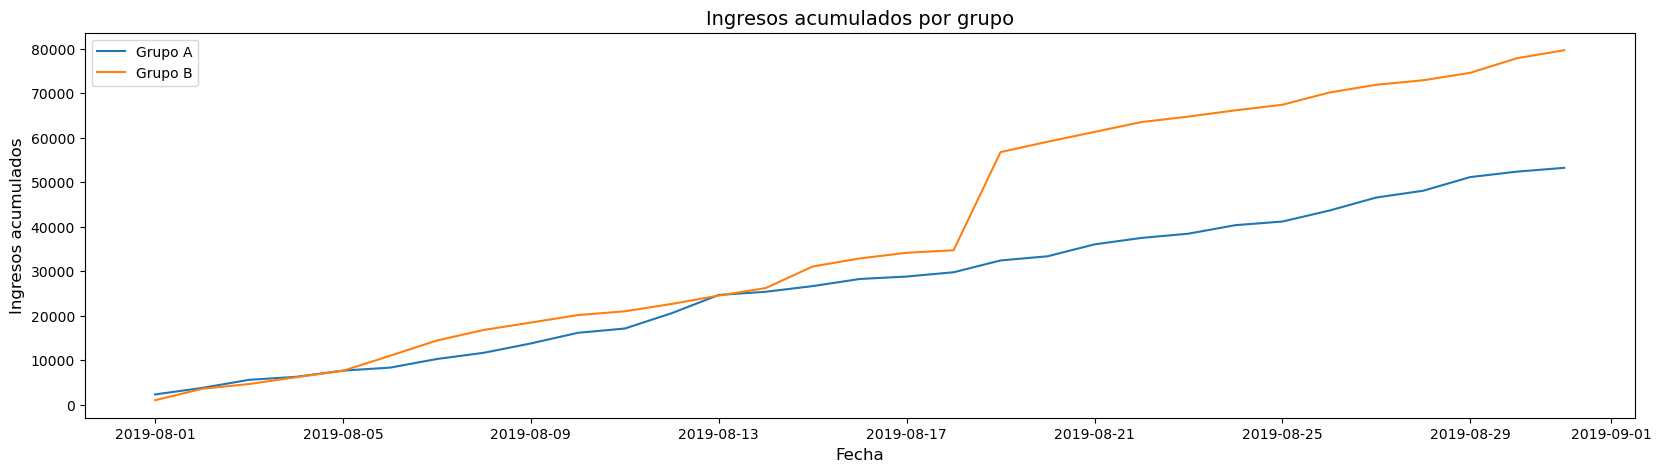

In [25]:
# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'n_orders']]

# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'n_orders']]

plt.figure(figsize=(20,5))
# Trazar el gráfico de ingresos del grupo A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Grupo A')

# Trazar el gráfico de ingresos del grupo B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Grupo B')

# Agregar etiquetas a los ejes
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Ingresos acumulados', fontsize=12)

plt.title('Ingresos acumulados por grupo', fontsize=14)

plt.legend()
plt.show()

#### NOTAS
+ Los ingresos aumentan constantemente durante toda la prueba para ambos grupos.
+ Cerca del 18 de agosto, el grupo B muestra un incremento inusual en los ingresos, después se vuelve a estabilizar.

## 2.2 Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

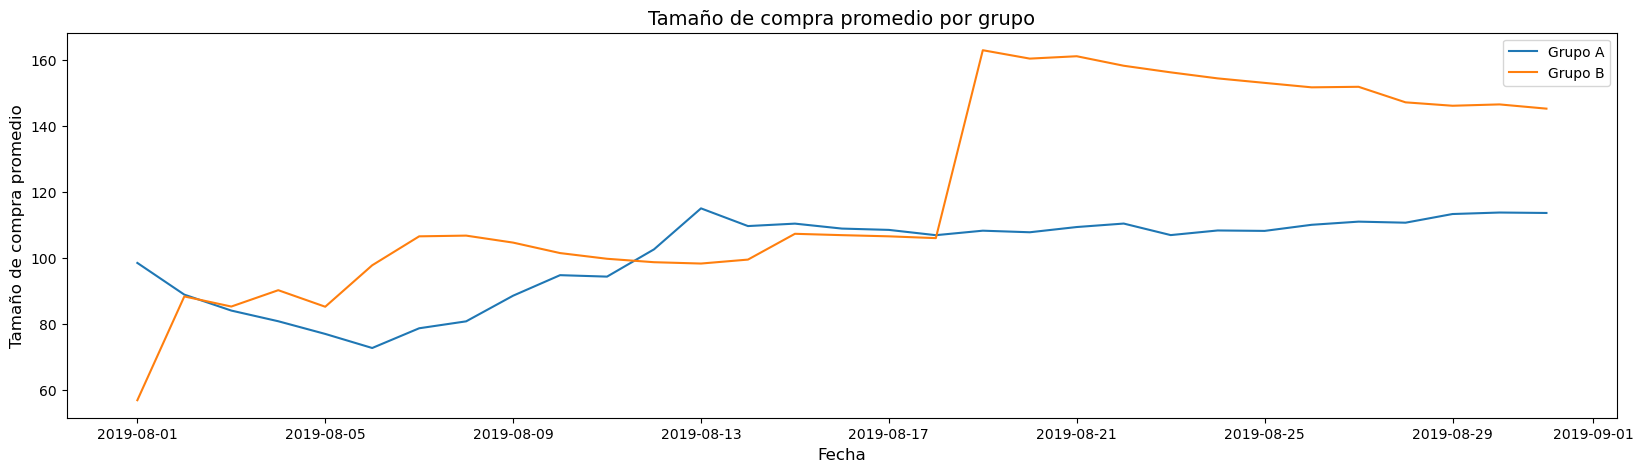

In [26]:
plt.figure(figsize=(20,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['n_orders'], label='Grupo A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['n_orders'], label='Grupo B')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Tamaño de compra promedio', fontsize=12)

plt.title('Tamaño de compra promedio por grupo', fontsize=14)
plt.legend()
plt.show()

#### NOTAS
+ El tamaño de compra promedio del grupo A se estabiliza a partir del 13 de agosto.
+ El tamaño de compra promedio del grupo B muestra un incremento inusual cerca del 19 de agosto. No lo atribuiría a la diferencia entre los experimentos, porque entonces se vería una diferencia desde el inicio. Puede ser una compra atípica que uno o varios usuarios ya tenían planeada.

## 2.3 Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

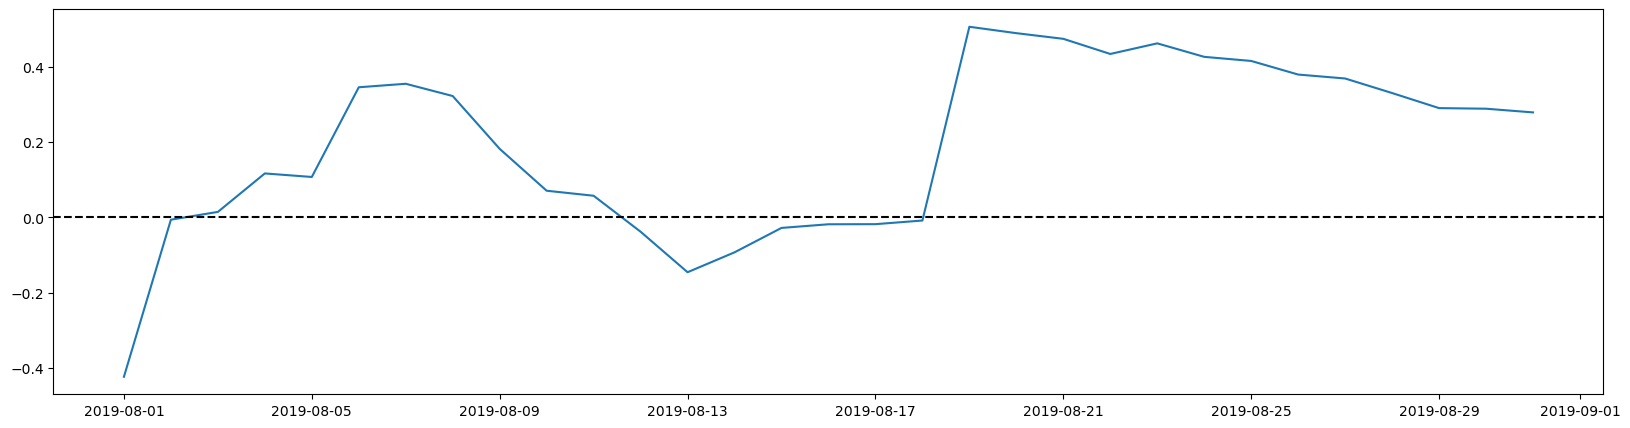

In [27]:
# reunir los datos en un DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# display(mergedCumulativeRevenue)
# trazar un gráfico de diferencia relativa para los tamaños de compra promedio
plt.figure(figsize=(20,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['n_ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['n_ordersA'])-1)

# agregar el eje X
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

#### NOTAS
+ En varios puntos del experimento hay diferencias grandes entre los grupos.
+ Se hace notar nuevamente la diferencia vista cerca del 18 de agosto. Debe haber pedidos grandes en el grupo B y podrían considerarse atípicos.

## 2.4 Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

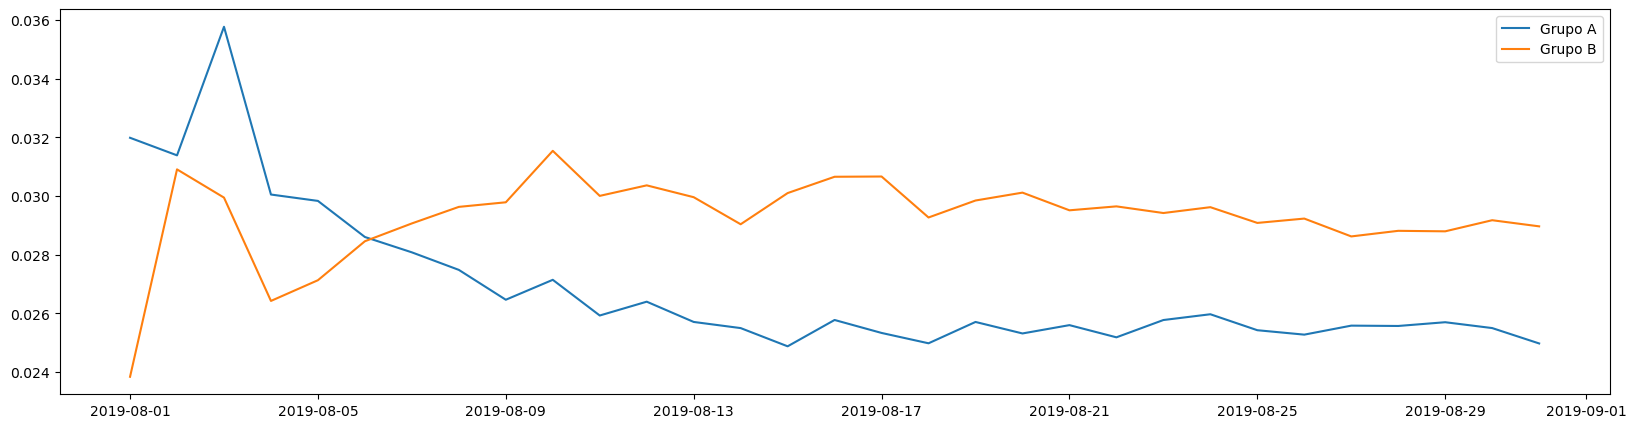

In [28]:
# calcular la conversión acumulada
cumulativeData['conversion'] = cumulativeData['n_orders']/cumulativeData['n_visitors']

# seleccionar datos en el grupo A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# seleccionar datos en el grupo B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# trazar los gráficos
plt.figure(figsize=(20,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='Grupo A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='Grupo B')
plt.legend()

# establecer la escala de los ejes
# plt.axis(["2019-04-01", '2019-04-23', 0, 0.015])
plt.show()

#### NOTAS
+ El grupo B superó al grupo A después del 6 de agosto.
+ Ambos grupos fluctuarion de manera similar entre el 9 y el 13 de agosto.
+ A partir del 18 de agostos ambos grupos se estabilizaron.

## 2.5 Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


,visitorid,transactionid
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1
5,48147722,1
6,54447517,1
7,56960363,1
8,66685450,1
9,71018815,1


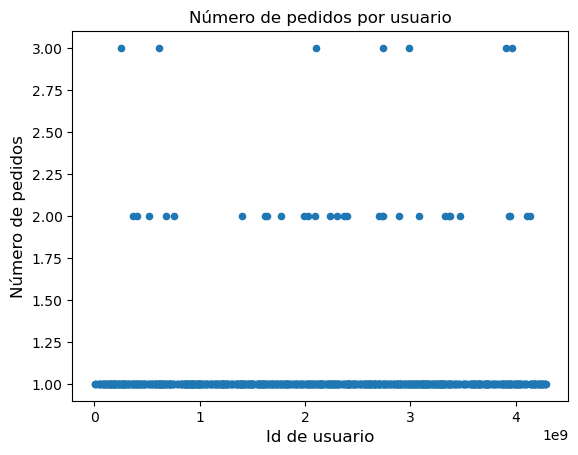

In [29]:
display(clean_orders)

#Agrupar la tabla clean_orders
transactionByUsers = clean_orders.groupby('visitorid',as_index=False).agg({'transactionid': 'nunique'})
display(transactionByUsers.head(10))

#Gráfico de dispersión
transactionByUsers.plot(kind='scatter',x='visitorid',y='transactionid')
plt.title('Número de pedidos por usuario')
plt.xlabel('Id de usuario', fontsize=12)
plt.ylabel('Número de pedidos', fontsize=12)
plt.show()

### NOTAS
+ La mayoría de los usuarios hacen 1 solo pedido. Hay algunos usuarios atípicos que realizaron 2 o hasta 3 pedidos.

## 2.6 Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [30]:
print('Percentiles 95/99:',np.percentile(transactionByUsers['transactionid'], [95, 99]))

Percentiles 95/99: [1. 2.]


### NOTAS
+ No más del 1% de los compradores hacen más de 2 compras.
+ No más del 5% de los compradores hacen más de 1 compra.
+ Para este análisis, el punto en el que consideraré datos anómalos será más de 1 compra.

## 2.7 Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B
10,3649131742,879864040,2019-08-15,65.7,A


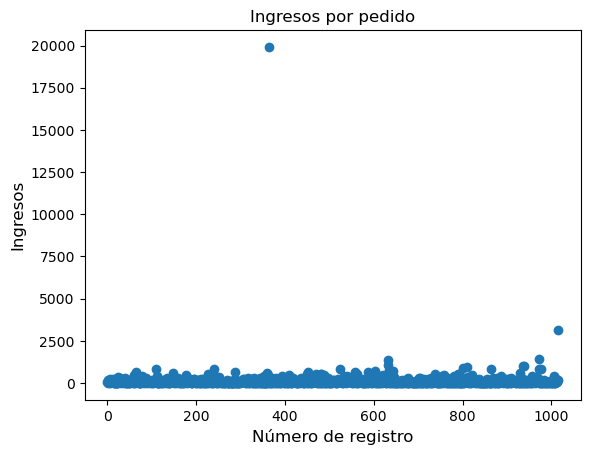

'Ingreso máximo en una compra: 19920.4'

,transactionid,visitorid,date,revenue,group
425,590470918,1920142716,2019-08-19,19920.4,B


,transactionid,visitorid,date,revenue,group
1196,3936777065,2108080724,2019-08-15,3120.1,B


In [31]:
display(clean_orders.head(10))

#Obtener un series limitado por el número de elementos en la columna revenue
x_values = pd.Series(range(0, len(clean_orders['revenue'])))

#Gráfico de dispersión
plt.scatter(x_values, clean_orders['revenue'])
plt.title('Ingresos por pedido')
plt.xlabel('Número de registro', fontsize=12)
plt.ylabel('Ingresos', fontsize=12)
plt.show()

display(f'Ingreso máximo en una compra: {clean_orders['revenue'].max()}')
display(clean_orders.query('revenue>10000'))
display(clean_orders.query('revenue>2000 and revenue <10000'))

### NOTAS
+ El gráfico de dispersión muestra un par de valores atípicos, de $$3,120.1 y $19,920.4).
+ Estos ingresos atípicos corresponden a usuarios del grupo B, y las fechas de compra coinciden con las observaciones hechas en las gráficas de ingresos acumulados por grupo y tamaño promedio de pedido.
+ Para hacer un análisis correcto, estos valores deberían ser descartados.

## 2.8 Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [32]:
display(clean_orders.head())
display(clean_visitors.head())

ordersByUsersA = clean_orders[clean_orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = clean_orders[clean_orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorid', 'orders']

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [33]:
display(ordersByUsersA.head())
display(ordersByUsersB.head())

,visitorid,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


,visitorid,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


In [34]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(clean_visitors[clean_visitors['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
display(sampleA)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(clean_visitors[clean_visitors['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
display(sampleB)

print("El valor p es {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Ganancia relativa de B contra A {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18736, dtype: int64

0        1
1        1
2        1
3        1
4        1
        ..
18383    0
18384    0
18385    0
18386    0
18387    0
Name: orders, Length: 18916, dtype: int64

El valor p es 0.011
Ganancia relativa de B contra A 0.160


### NOTAS
+ El valor p es menor que 0.05, por lo que rechazamos la hipótesis nula. Hay diferencias estadísticamente significativas entre las distribuciones.
+ La ganancia relativa del grupo B es de 16%.

## 2.9 Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [35]:
print('El valor p es {0:.3f}'.format(stats.mannwhitneyu(clean_orders[clean_orders['group']=='A']['revenue'], clean_orders[clean_orders['group']=='B']['revenue'])[1]))
print('El tamaño de pedido promedio para B contra A es {0:.3f}'.format(clean_orders[clean_orders['group']=='B']['revenue'].mean()/clean_orders[clean_orders['group']=='A']['revenue'].mean()-1))

El valor p es 0.862
El tamaño de pedido promedio para B contra A es 0.278


### NOTAS
+ El valor p es mayor a 0.05, por lo que no se puede rechazar la hipótesis nula. No hay evidencia para afirmar que las distribuciones son diferentes.
+ El grupo B tiene un tamaño de pedido promedio 27.8% mayor que el grupo A.

## 2.10 Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [36]:
#Filtrar a los usuarios que tienen más de 1 pedido
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['visitorid'], ordersByUsersB[ordersByUsersB['orders'] > 1]['visitorid']], axis = 0)

#Filtrar a los usuarios con órdenes más caras
#Calcular media y desviación estándar
media_revenue = clean_orders['revenue'].mean()
std_revenue = clean_orders['revenue'].std()

#Definir un límite basado en 3 desviaciones estándar
limite_superior = media_revenue + 3 * std_revenue

print(f"Límite superior (3 sigmas): {limite_superior}")

#Filtrar pedidos caros según el límite
pedidos_caros = clean_orders[clean_orders['revenue'] > limite_superior]
usersWithExpensiveOrders = clean_orders[clean_orders['revenue'] > limite_superior]['visitorid']

#Combinar usuarios con mas de 1 transaccion y con pedidos muy alto ( usuarios "anómalos") y serán excluidos del análisis
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

Límite superior (3 sigmas): 2075.0102965203964
33    249864742
36    366673373
51    406208401
67    522292794
58    611059232
Name: visitorid, dtype: int64
(38,)


In [37]:
#Preparar muestras con el número de pedidos por usuario
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(clean_visitors[clean_visitors['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(clean_visitors[clean_visitors['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [38]:
print("El valor p es {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("La diferencia relativa de B contra A es {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

El valor p es 0.011
La diferencia relativa de B contra A es 0.178


### NOTAS
+ Para el análisis de datos en bruto, el valor p es 0.011 y la ganancia relativa de B contra A 0.160
+ Para el análisis de datos sin anomalías, el valor p es 0.011 y la ganancia relativa de B contra A 0.178
+ Con el nuevo valor p se sigue rechazando la hipótesis nula, existen diferencias estadísticamente significativas entre las muestras. 
+ El grupo B muestra una diferencia de conversión del 17.8%

## 2.11 Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [39]:
 # Evalúa la distribución de los ingresos (revenue) entre los grupos A y B, usando datos filtrados
print("El valor p es {0:.3f}".format(stats.mannwhitneyu( 
            clean_orders[np.logical_and(clean_orders['group'] == 'A',np.logical_not(clean_orders['visitorid'].isin(abnormalUsers)),)]['revenue'],
            clean_orders[np.logical_and(clean_orders['group'] == 'B',np.logical_not(clean_orders['visitorid'].isin(abnormalUsers)),)]['revenue'],)[1]))


print("La diferencia relativa de B contra A es {0:.3f}".format(clean_orders[np.logical_and(clean_orders['group'] == 'B',
                                    np.logical_not(clean_orders['visitorid'].isin(abnormalUsers)),
                                    )]['revenue'].mean() / clean_orders[np.logical_and(clean_orders['group'] == 'A',np.logical_not(clean_orders['visitorid'].isin(abnormalUsers)),)]['revenue'].mean() - 1))

El valor p es 0.850
La diferencia relativa de B contra A es -0.066


### NOTAS
+ Para el análisis de datos en bruto, el valor p es 0.862 y el tamaño de pedido promedio para B contra A es 0.278
+ Para el análisis de datos sin anomalías, el valor p es 0.85 y la ganancia relativa de B contra A -0.066
+ El nuevo valor p nos indica que no se puede rechazar la hipótesis nula, no hay evidencia para afirmar que existen diferencias entre las muestras
+ El grupo B muestra una diferencia en el tamaño promedio de pedido de -6.6%

# 3. CONCLUSIONES FINALES

 Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son:
 1. Parar la prueba, considerar a uno de los grupos como líder
2.  Parar la prueba, concluir que no hay diferencia entre los grupos
3.  Continuar la prueb.. cia y avanzar con confianza.

Decisión 1: Parar la prueba, considerar a uno de los grupos como líder

Condiciones:
1. Hay una diferencia estadísticamente significativa entre los grupos (valor-p < 0.05).
2. La magnitud de la mejora es relevante para el negocio.
3. Los datos no muestran fluctuaciones importantes en los resultados.

Decisión 2: Parar la prueba, concluir que no hay diferencia entre los grupos

Condiciones:
1. No se encuentra una diferencia estadísticamente significativa (valor-p ≥ 0.05).
2. La magnitud de la diferencia es mínima y no afecta significativamente la métrica de éxito.
3. El tiempo de prueba es suficiente para garantizar confianza en los resultados.

Decisión 3: Continuar la prueba

Condiciones:
1. Los datos actuales no tienen suficiente tamaño de muestra para alcanzar significancia estadística.
2. Los resultados son inconsistentes o muestran fluctuaciones importantes a lo largo del tiempo.
3. Probar el impacto de otros factores externos antes de tomar una decisión (por ejemplo, promociones, cambios estacionales).
  
### Concluyo parar la prueba y poner al grupo B como líder, basado en la observación de todas las métricas. Incluso al remover anomalías y no encontrar diferencias significativas, el grupo B se sigue mostrando a la cabeza de la prueba. 